# Preprocesamiento

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import random

import torch

import pytorch_common.util    as pu
from util   import set_seed

from scipy import stats
from scipy.signal import savgol_filter

import data as dt

## Setup

In [4]:
pu.LoggerBuilder().on_console().build()

<RootLogger root (INFO)>

In [5]:
pu.set_device_name('gpu')

In [6]:
pu.get_device()

device(type='cuda', index=0)

In [7]:
torch.cuda.is_available()

True

In [8]:
torch.__version__

'1.12.1+cu116'

In [9]:
sns.set(rc = {'figure.figsize':(8,4)})

In [10]:
set_seed(42)

In [11]:
DATASET_PATH = '../datasets/consumo_energetico_diario.csv'

## Preprocessing

#### 1. Load dataset.

In [12]:
dataset = pd.read_csv(DATASET_PATH)
dataset.columns = dataset.columns.str.lower()

dataset.head()

,dia,mwh,tmp
0,2005-12-01,81445.928,18.104167
1,2005-12-02,81749.888,17.904167
2,2005-12-03,72134.590,19.562500
3,2005-12-04,63452.628,18.854167
4,2005-12-05,81508.078,21.941667


In [13]:
dataset.shape

(5722, 3)

<Figure size 576x288 with 1 Axes>

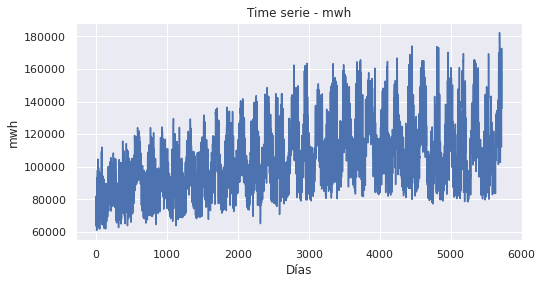

<Figure size 576x288 with 1 Axes>

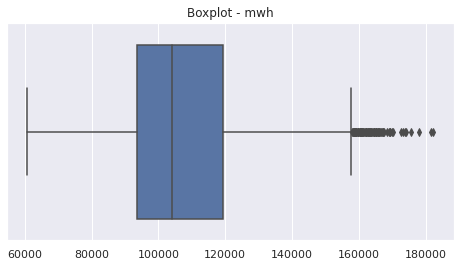

<Figure size 576x288 with 1 Axes>

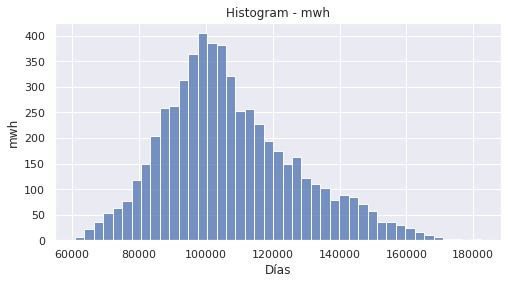

In [14]:
dt.plot_ts_var(dataset, 'mwh')

<Figure size 576x288 with 1 Axes>

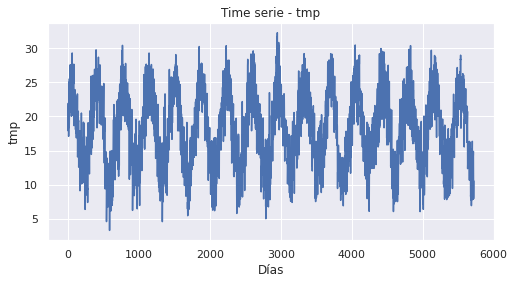

<Figure size 576x288 with 1 Axes>

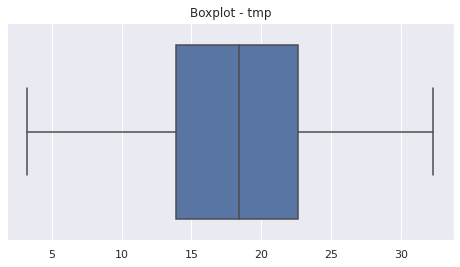

<Figure size 576x288 with 1 Axes>

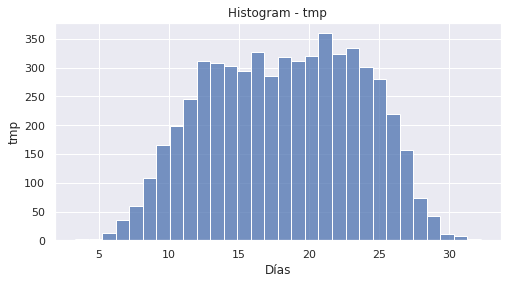

In [15]:
dt.plot_ts_var(dataset, 'tmp')

In [173]:
import math

def moving_avg(tensor, window_size):
    moving_avg = torch.nn.AvgPool1d(window_size, stride=1, padding=math.floor(window_size / 2))
    return moving_avg(tensor.unsqueeze(0)).squeeze(0)

WEEK  = 7
MONTH = 29
YEAR  = 365

In [174]:
mwh_daily = torch.tensor(dataset['mwh'])
mwh_weekly  = moving_avg(mwh_daily, WEEK)
mwh_monthly = moving_avg(mwh_daily, MONTH)
mwh_annual  = moving_avg(mwh_daily, YEAR)

mwh_daily.shape, mwh_weekly.shape, mwh_monthly.shape, mwh_annual.shape

(torch.Size([5722]), torch.Size([5722]), torch.Size([5722]), torch.Size([5722]))

<Figure size 576x288 with 1 Axes>

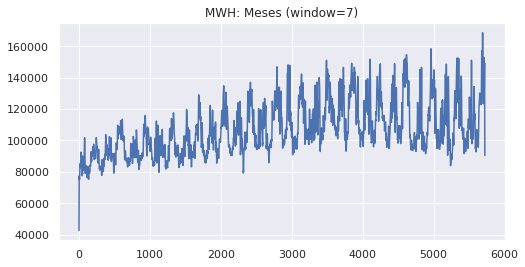

In [176]:
dt.plot_ts(mwh_weekly, title='MWH: Meses (window=7)')

<Figure size 576x288 with 1 Axes>

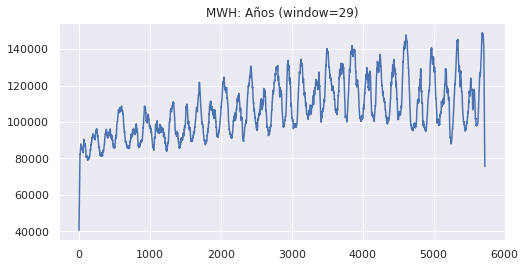

In [177]:
dt.plot_ts(mwh_monthly, title='MWH: Años (window=29)')

Observaciones:

* 2021 - 2005 = 16 años
* En el grafico vemos 32 picos, por ko tatnto tenemos dos picos por año.
* Esto nos dice que tenemos dos perodiso en el año del alto consumo (Invierno y verano).

<Figure size 576x288 with 1 Axes>

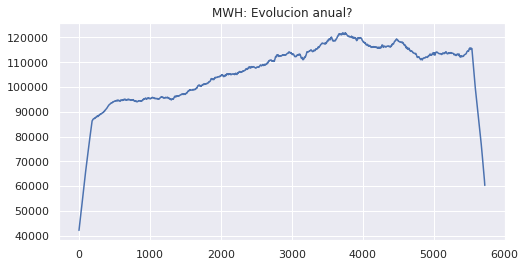

In [178]:
dt.plot_ts(mwh_annual, title='MWH: Evolucion anual?')

In [183]:
tmp_daily = torch.tensor(dataset['tmp'])
tmp_weekly  = moving_avg(tmp_daily, WEEK)
tmp_monthly = moving_avg(tmp_daily, MONTH)
tmp_annual  = moving_avg(tmp_daily, YEAR)

tmp_daily.shape, tmp_weekly.shape, tmp_monthly.shape, tmp_annual.shape

(torch.Size([5722]), torch.Size([5722]), torch.Size([5722]), torch.Size([5722]))

<Figure size 576x288 with 1 Axes>

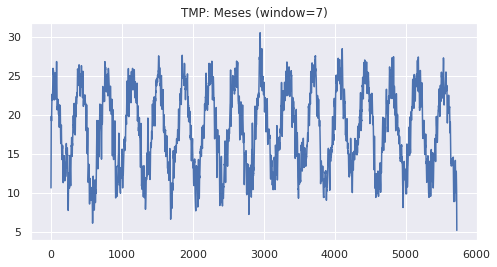

In [184]:
dt.plot_ts(tmp_weekly, title='TMP: Meses (window=7)')

<Figure size 576x288 with 1 Axes>

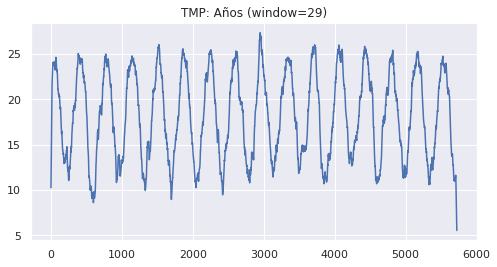

In [185]:
dt.plot_ts(tmp_monthly, title='TMP: Años (window=29)')

Observaciones:
 
* Hay 16 picos de temperatura maxima que concuerdan con el verano en cada año.
* Lo mismo sucede con el invierno.

<Figure size 576x288 with 1 Axes>

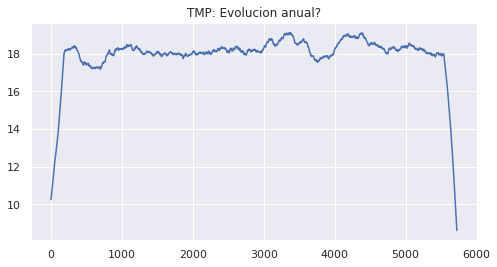

In [186]:
dt.plot_ts(tmp_annual, title='TMP: Evolucion anual?')